# Data visualisation HW2 - Reproduction.

### The goal is:
<img src="https://github.com/trokhymovych/data-viz-UCU2019/raw/master/HW2/rate.png">

In [7]:
# import libraries
import altair as alt
import pandas as pd
import numpy as np

In [291]:
# it just needs to be here so we can work with big files 
alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

Styles used:

Background - #F3F7F7

Title - #3A3F4A, 36px

Caption - #5D646F, 12px

Axis text - #5D646F, 12 px

Legend title & text - #5D646F, 12 px

Font Family - Ubuntu Mono

Color scale #67001f, #f7f7f7, #053061

In [292]:
# Upploading data
df = pd.read_csv('https://github.com/trokhymovych/data-viz-UCU2019/raw/master/HW2/rate.csv')
df.head()

,region,year,rate
0,Crimea,1990,2.5
1,Vinnytsia,1990,-2.1
2,Volyn,1990,4.0
3,Dnipropetrovsk,1990,0.5
4,Donetsk,1990,-1.2


In [327]:
# configurations
background = '#F3F7F7'
font = 'Ubuntu Mono'
title_color, title_size = '#3A3F4A', 36
text_color, text_size = '#5D646F', 12
color_scale = ['#67001f', '#f7f7f7', '#053061']

width=800 
height=440

title_text = 'Population growth rate by region'
subtitle = 'population growth rate, per 1000'

In [242]:
# configure colors
domain = [df.rate.min(), 0, df.rate.max()]
range_ = color_scale

# order of labels
order = ['Zakarpattia', 'Rivne', 'Kyiv city', 'Ivano-Frankivsk', 'Volyn', 'Chernivtsi', 'Lviv', 
      'Ternopil','Sevastopol','Crimea','Odesa','Kherson','Mykolaiv','Khmelnytskyi','Zhytomyr',
      'Zaporizhia','Kyiv','Vinnytsia','Dnipropetrovsk', 'Kharkiv', 'Kirovohrad', 'Cherkasy', 'Donetsk',
      'Luhansk', 'Poltava', 'Sumy', 'Chernihiv']

In [265]:
# axes
axisX = alt.Axis(values = [i for i in range(1990,2016,5)],
                 grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle =0,
                 labelColor = text_color,
                 labelFontSize = text_size,
                 labelFont = font,
                 labelPadding = -height-14,
                 )

axisY = alt.Axis(
                 grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle =0,
                 labelColor = text_color,
                 labelFontSize = text_size,
                 labelFont = font,
                 labelPadding = -1*width-3,
                 labelAlign = 'left'
                 )

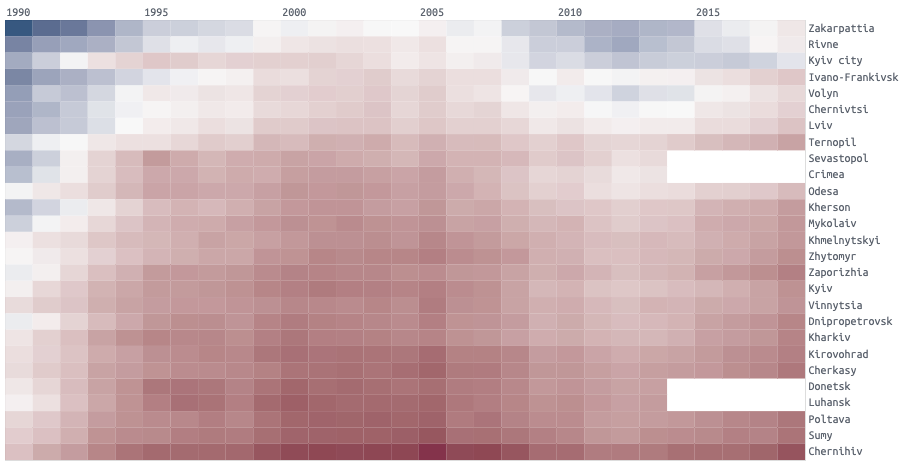

In [363]:
# heatmap
main = alt.Chart(df).mark_rect(opacity = 0.8).encode(
    x = alt.X('year:N', axis = axisX, title='', scale=alt.Scale(zero=False)),
    y = alt.Y('region:N', axis = axisY, title='', scale=alt.Scale(zero=False), sort = order),
    color = alt.Color('rate:Q', legend= None, scale=alt.Scale(domain=domain, range=range_, padding=0)),
).properties(
    width=width, height=height
)
main

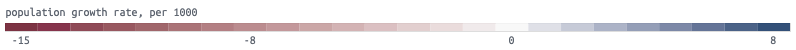

In [367]:
# customized legend + subtitle
ax = alt.Axis(values = [-15,-8,0,8],
                 grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = text_color,
                 labelFontSize = text_size,
                 labelFont = font,
                 labelPadding = 3,
                 position = 0,
                 titleFontSize = text_size,     #subtitle
                 titleFontWeight = 'lighter',
                 titleColor = text_color,
                 titlePadding = 0,
                 titleFont = font,
                 titleAngle = 0,
                 titleAnchor = 'start', titleY = -25
                 )

# custom legend
temp_df = pd.DataFrame({'range':[i for i in range(-15,9,1)]})

legend = alt.Chart(temp_df).mark_rect(opacity = 0.8).encode(
    x = alt.X('range:N',title = subtitle, axis = ax),
    color = alt.Color('range:Q', legend= None, scale=alt.Scale(domain=domain, range=range_)),
).properties(width=width-15, height=8)
legend 

In [368]:
# title
text_df_footer = pd.DataFrame({'text':[title_text]})
title = alt.Chart(text_df_footer).mark_text(fontWeight = 600, fontSize=title_size, font=font, color = title_color, dx = -width/2,align = 'left').encode(
    text='text').properties(width=width, height=40)

# footer
text_df_footer = pd.DataFrame({'text':['Data: State Statistics Service of Ukraine']})
footer = alt.Chart(text_df_footer).mark_text(fontSize=text_size, font=font, color = text_color, dx = width/2, align = 'right').encode(
    text='text').properties(width=width, height=40)

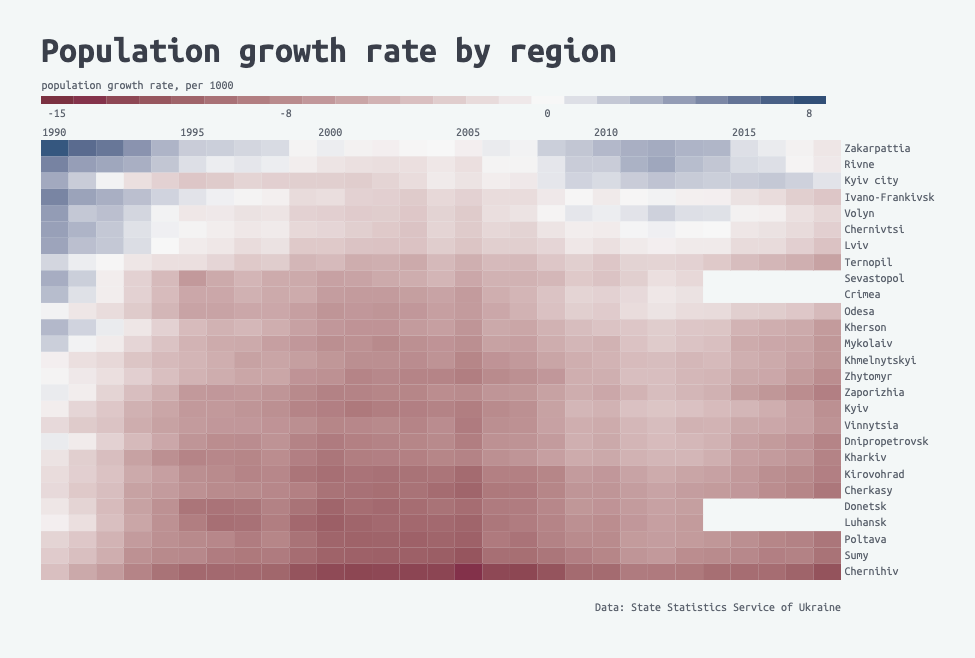

In [369]:
# composition of all parts
chart = alt.vconcat(title,legend, main,footer, spacing=5)
chart.configure(background=background,  
                padding={"left": 40, "top": 30, "right": 40, "bottom": 30}
).configure_view(
    stroke='transparent'
)